In [1]:
import numpy as np
import pandas as pd

In [2]:
df3 = pd.read_csv("delhi_cases.csv",parse_dates=["Date"])

In [3]:
corr_twenty_df = pd.DataFrame(df3, columns=['Date','Confirmed','Twenty'])

In [4]:
corr_twenty_df.head()

,Date,Confirmed,Twenty
0,2020-02-03,1,1.0
1,2020-03-03,1,1.0
2,2020-04-03,1,1.0
3,2020-05-03,2,1.0
4,2020-06-03,3,1.0


In [5]:
corr_twenty_df["Confirmed"]=corr_twenty_df["Confirmed"].astype("float64")

In [6]:
df_droppednan_20 = corr_twenty_df.dropna()

In [7]:
import scipy.stats as stats
import scipy.stats

In [8]:
pearsonr_x = df_droppednan_20["Confirmed"]
pearsonr_y = df_droppednan_20["Twenty"]

In [9]:
scipy.stats.pearsonr(pearsonr_x, pearsonr_y)

(0.9577052012488901, 1.6554601682460056e-63)

In [10]:
scipy.stats.spearmanr(pearsonr_x, pearsonr_y)

SpearmanrResult(correlation=0.9997923755252694, pvalue=1.2990946855640517e-194)

In [11]:
scipy.stats.kendalltau(pearsonr_x, pearsonr_y) 

KendalltauResult(correlation=0.996311374359516, pvalue=4.185270783457763e-56)

In [12]:
result = scipy.stats.linregress(pearsonr_x, pearsonr_y)
result.slope

0.06496736925008663

In [13]:
result.intercept

102.97940929975323

In [14]:
result.rvalue

0.95770520124889

In [15]:
result.pvalue

1.6554601682462434e-63

In [16]:
result.stderr

0.00182821866316841

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [18]:
line = f'Regression line: y={result.intercept:.2f}+{result.slope:.2f}x, r={result.rvalue:.2f}'

In [19]:
line

'Regression line: y=102.98+0.06x, r=0.96'

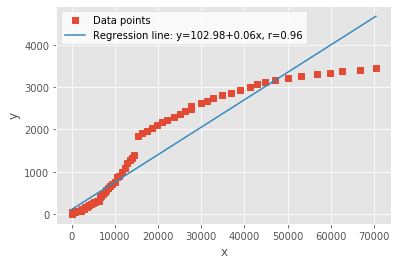

In [20]:
fig, ax = plt.subplots()
ax.plot(pearsonr_x, pearsonr_y, linewidth=0, marker='s', label='Data points')
ax.plot(pearsonr_x, result.intercept + result.slope * pearsonr_x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()